# Surprise Housing
### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market. We need to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Steps to solve the problem:
1. Reading & understanding the data (EDA)
2. Preparing the data for modeling
3. Model Building
4. Making predictions and Evaluation on the test set
5. Interpreting the model

In [120]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Step 1 : Reading & understanding the data (EDA)

In [94]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Note The SalePrice mean and median are not close and hence it won't be normally distributed

In [95]:
# check missing percentage
perMissing = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
perMissing.head(15)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
dtype: float64

### Data Cleaning

In [96]:
# Dropping Columns with high missing values
# Id, MoSold, Street, Utilities (dropping this not because of count, irrelevant)

data.drop(['Id', 'MoSold', 'LotFrontage', 'Street', 'Utilities', 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], inplace=True, axis=1)


In [97]:
# Converting years to age
data['YearBuiltAge'] = data['YearBuilt'].max() - data['YearBuilt']
data['YearRemodAddAge'] = data['YearRemodAdd'].max() - data['YearRemodAdd']
data['YrSoldAge'] = data['YrSold'].max() - data['YrSold']
data['GarageYrBltAge'] = data['GarageYrBlt'].max() - data['GarageYrBlt']

# Dropping columns
data.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [98]:
data[['YearBuiltAge','YearRemodAddAge','YrSoldAge','GarageYrBltAge']].head(10)


,YearBuiltAge,YearRemodAddAge,YrSoldAge,GarageYrBltAge
0,7,7,2,7.0
1,34,34,3,34.0
2,9,8,2,9.0
3,95,40,4,12.0
4,10,10,2,10.0
5,17,15,1,17.0
6,6,5,3,6.0
7,37,37,1,37.0
8,79,60,2,79.0
9,71,60,2,71.0


In [99]:
# Funtion to treat missing values in the dataframe

def dealWithMissingValues(df):       
    # checking null values
    NA_col = df.isnull().sum()
    # find out columns which have nulls
    NA_col = NA_col[NA_col > 0]

    for col in NA_col.index:
        if df[col].dtype.name == 'object':
            # impute mode
            df[col].fillna(data[col].mode()[0], inplace=True)
            
        elif df[col].dtype.name == 'float64' or df[col].dtype.name == 'int64' or df[col].dtype.name == 'int32':
            # impute median
            df[col] = df[col].fillna((df[col].median()))
            
        else:
            print('Unable to detect the datatype for col - ', col)
            
    return df

In [100]:
data = dealWithMissingValues(data)

In [101]:
# checking missing percentage again, should be 0 now, for every col
perMissing = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
perMissing.head()

MSSubClass      0.0
KitchenAbvGr    0.0
GarageFinish    0.0
GarageType      0.0
Fireplaces      0.0
dtype: float64

Let's try to find the variables which are closely correlated with the target variable, using the heatmap

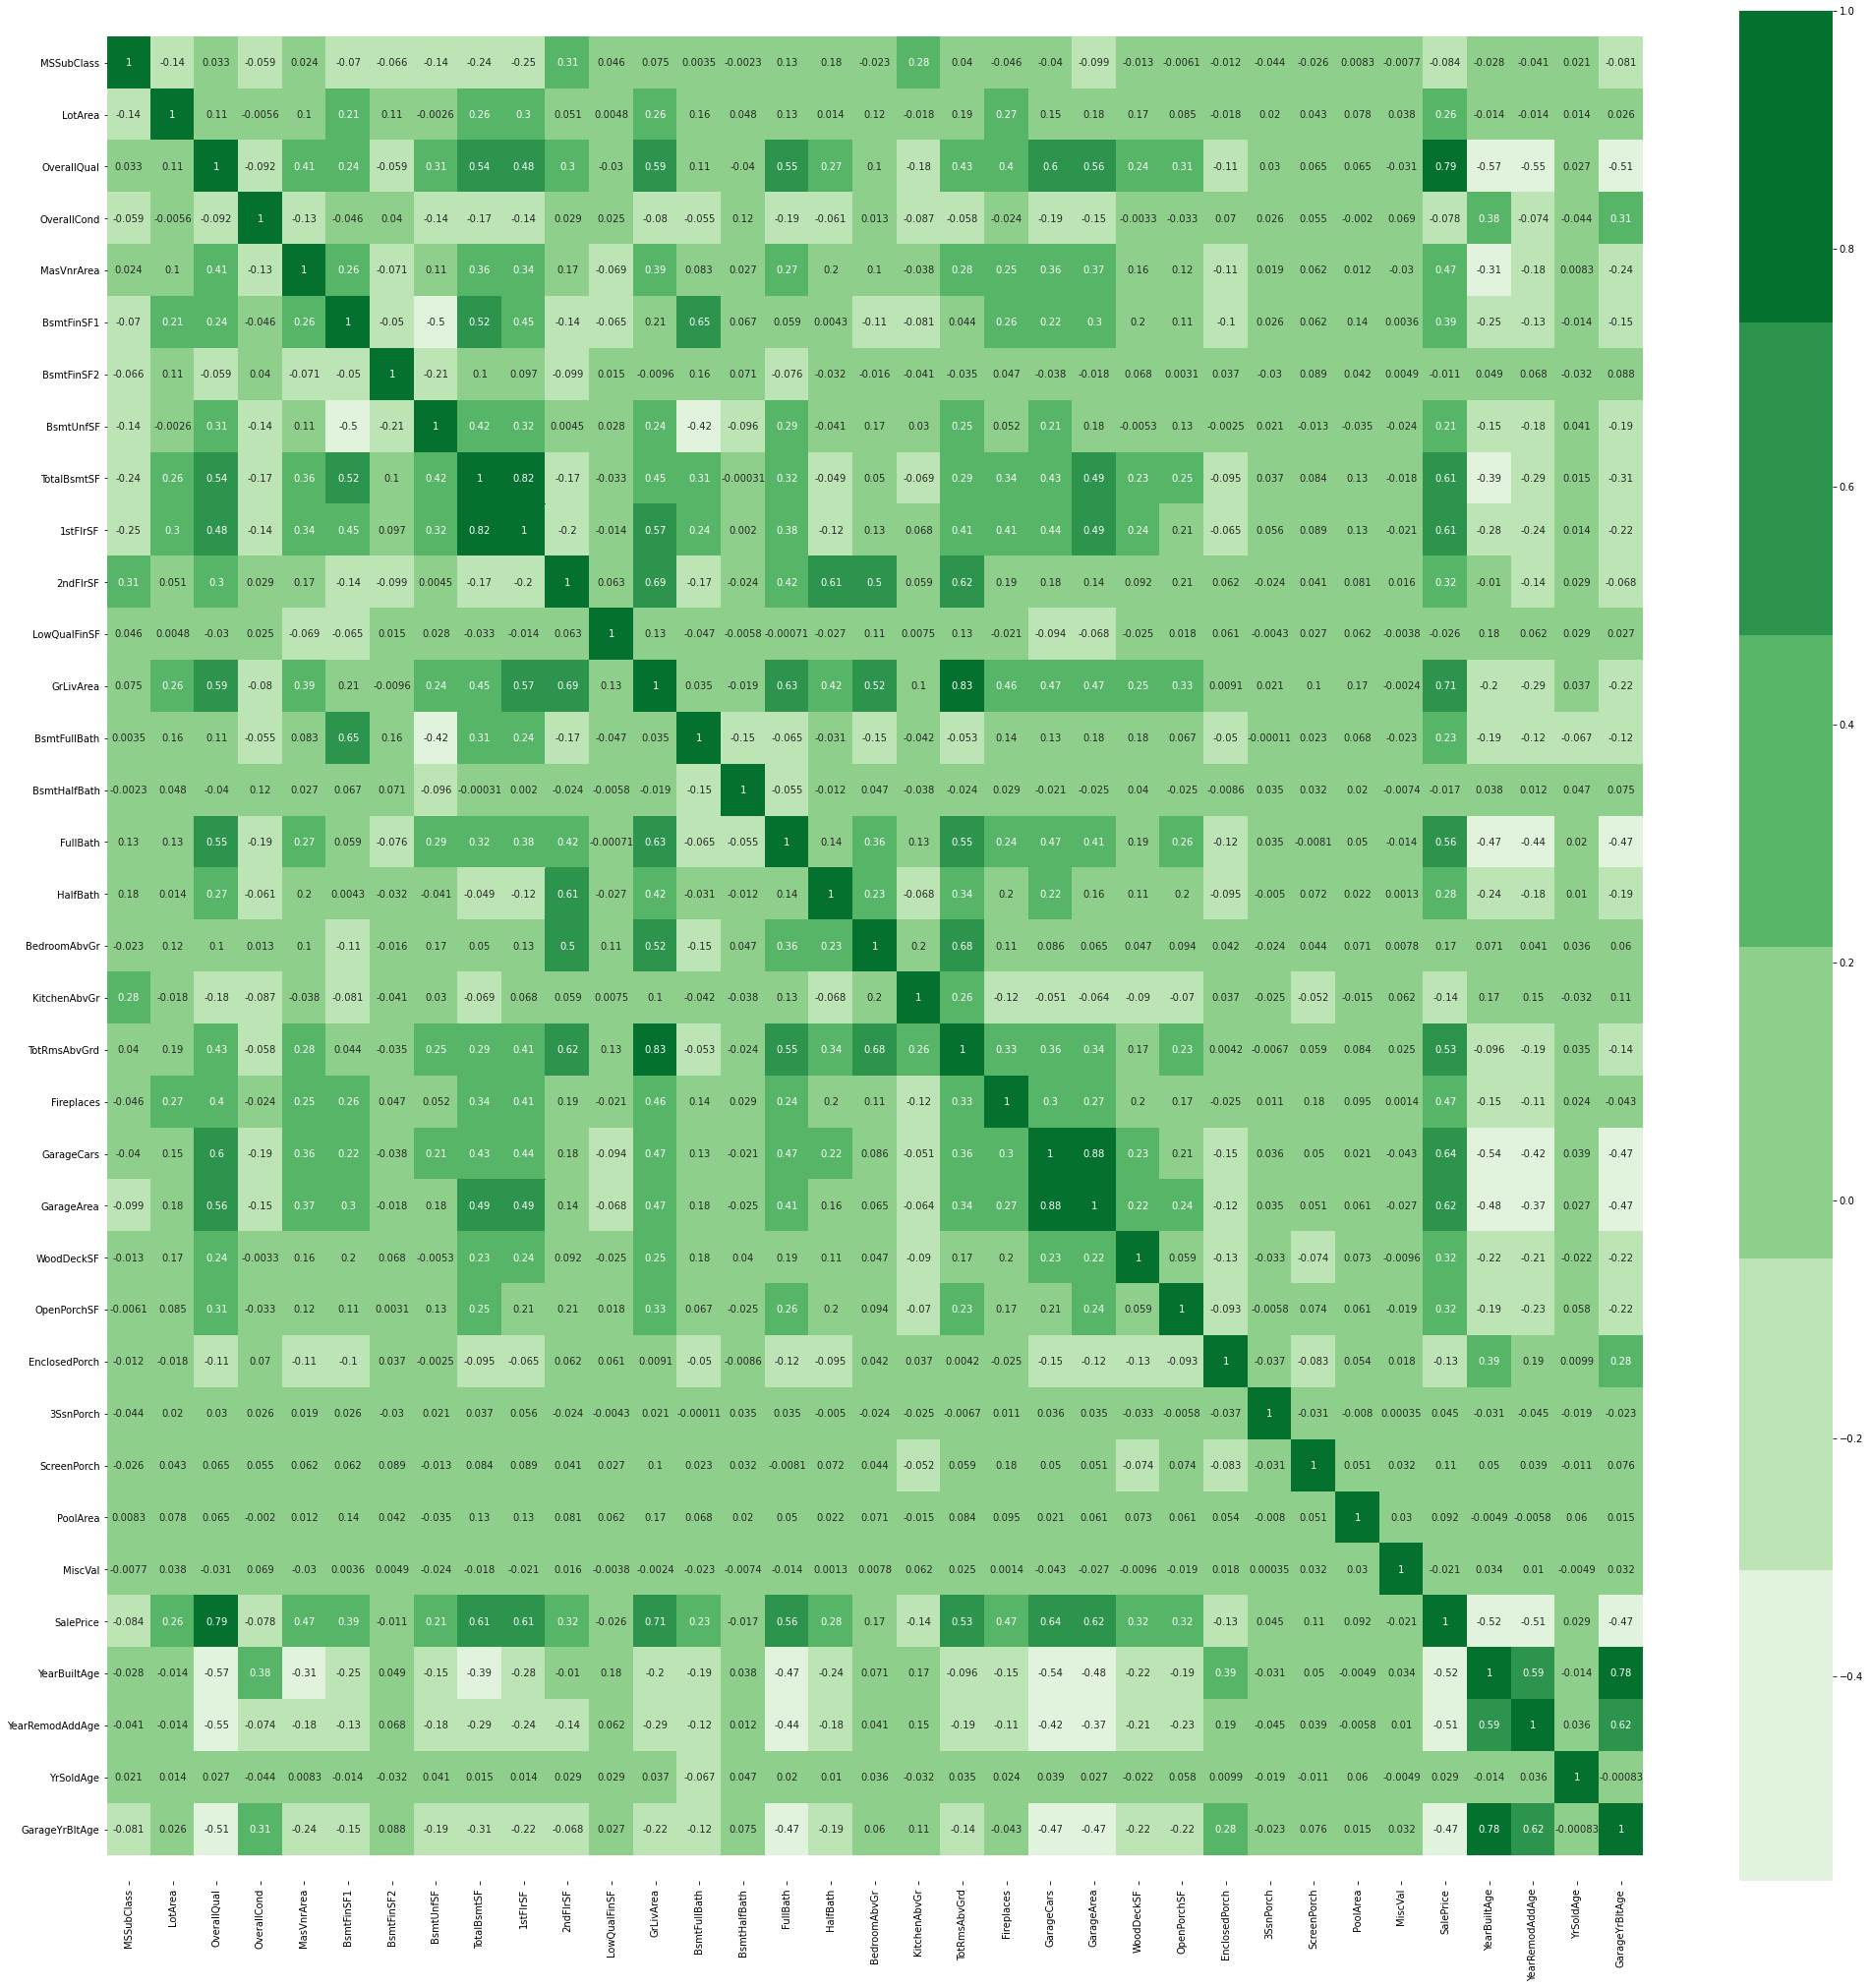

In [102]:
f, ax = plt.subplots(figsize=(35, 35))
colormap = sns.color_palette("Greens")
sns.heatmap(data.corr(), 
            annot= True,
            xticklabels=data.corr().columns.values,
            yticklabels=data.corr().columns.values,
            cmap=colormap)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [103]:
corrVals = data[list(data.dtypes[data.dtypes != 'object'].index)].corr()

In [104]:
corrCoefs = corrVals[corrVals['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(corrCoefs[1:])
corrCoefCols = [idx for idx in corrCoefs.index]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


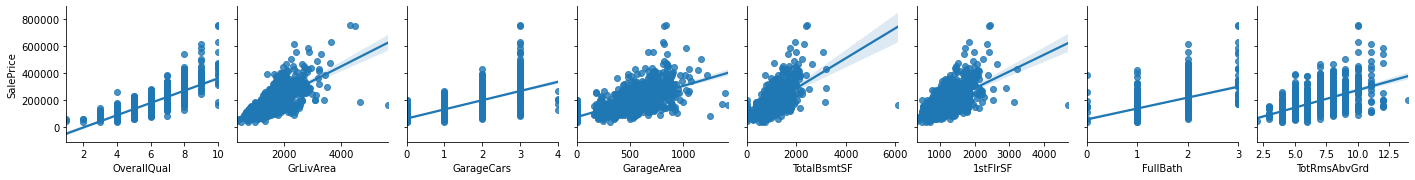

In [105]:
# Pair plot for the correlated features
sns.pairplot(data, x_vars=corrCoefCols[1:], y_vars=[corrCoefCols[0]], kind="reg" )

### Lets check the qualitative columns now

In [106]:
qualitative = [f for f in data.columns if data.dtypes[f] == 'object']

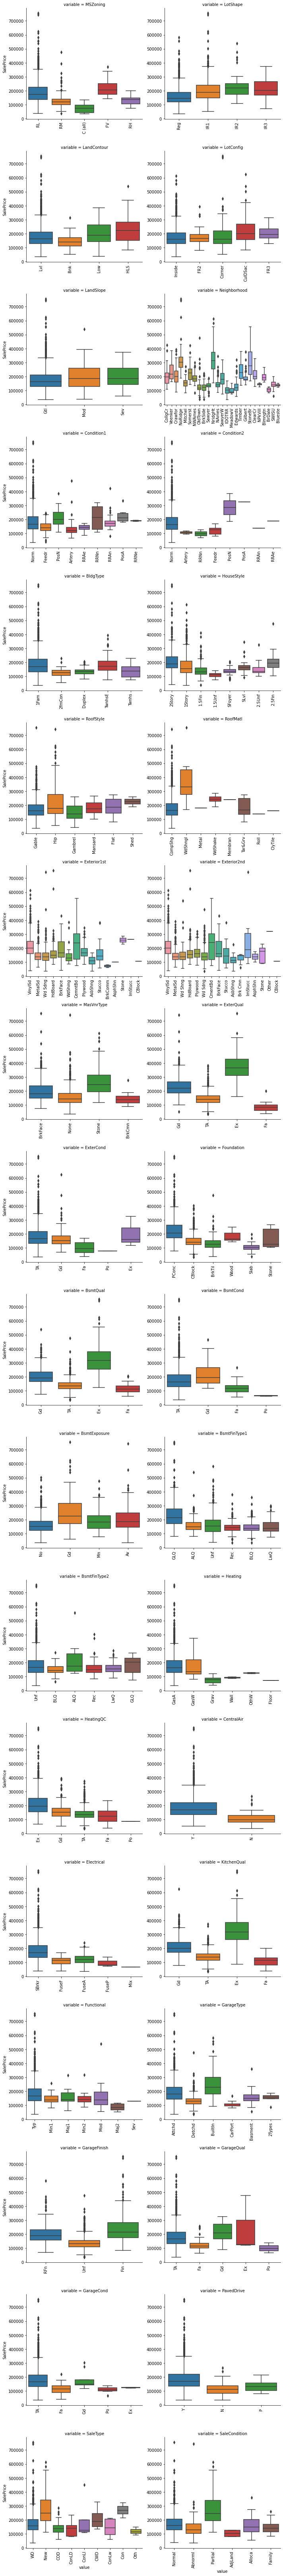

In [107]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(data, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

### Encoding

In [108]:
# Label Encoding, there are some variables whose values have an ordering e.g.  poor, bad, good, Excellent etc.
# we can do label encoding for such variables
catVars = ['LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 
                'GarageFinish', 'GarageQual', 'GarageCond', 'ExterCond', 'LotShape']

In [109]:
def doLabelEncoding(colNames):
    for colName in colNames:
        unique_vals = data[colName].unique()
        map_vals = {}
        for idx, val in enumerate(unique_vals):
            map_vals[val] = idx
        data[colName] = data[colName].map(map_vals)

In [110]:
doLabelEncoding(catVars)

In [111]:
data[catVars].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1
3,0,1,1,1,0,1,0,1,0,0,1,0,0,0,1
4,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1


In [112]:
# Dummy Encoding, there are some variables whose values doesn't have an ordering
# we can do dummy encoding for such variables
dumVars = ['MSSubClass','MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']

In [113]:
dummies = pd.get_dummies(data[dumVars], drop_first = True)
data = pd.concat([data, dummies], axis = 1)
data.drop(dumVars, axis = 1, inplace = True)

In [114]:
data.head()

,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,0,0,7,5,196.0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,9600,0,0,6,8,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,11250,1,0,7,5,162.0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,9550,1,0,7,5,0.0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,14260,1,0,8,5,350.0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


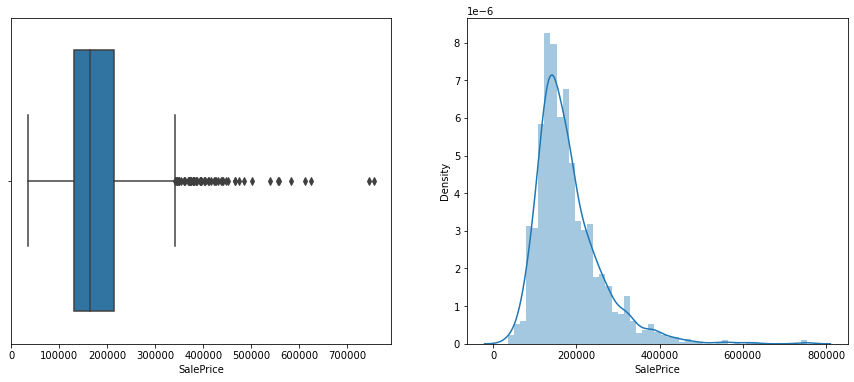

In [115]:
# check the SalePrice
f, axes = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(data['SalePrice'],  orient='v' , ax=axes[0])
sns.distplot(data['SalePrice'], ax=axes[1])
plt.show()

# It looks right-skewed

In [116]:
# Now since target variable is right skewed, therefore, to treat this we would need to do some transformation to it
# Transform SalePrice
data['SalePrice'] = np.log(data['SalePrice'])

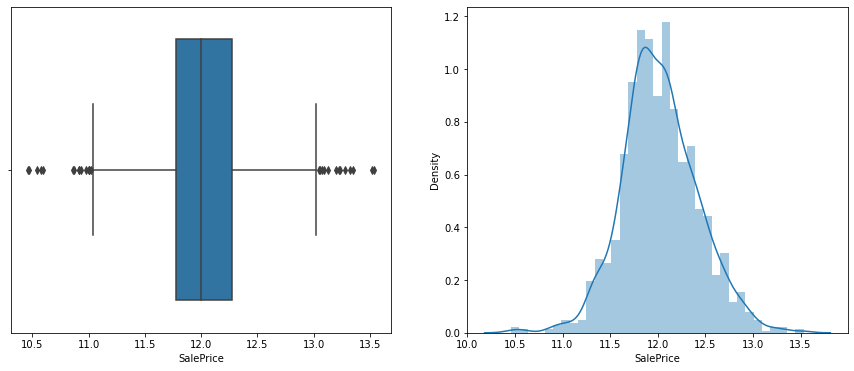

In [117]:
#check the sales price again
f, axes = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(data['SalePrice'],  orient='v' , ax=axes[0])
sns.distplot(data['SalePrice'], ax=axes[1])
plt.show()

## Model Building

In [118]:
# Create train and test data
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [121]:
# Scaling the data
scaler_col = ['LotArea','OverallQual','OverallCond', 'MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF',
              'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
              'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[scaler_col] = scaler.fit_transform(df_train[scaler_col])
df_test[scaler_col] = scaler.transform(df_test[scaler_col])

In [122]:
df_train.head()

,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.473765,0,0,-0.779861,0.383154,-0.558025,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
318,-0.056845,0,1,0.649651,-0.533005,0.809137,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
239,-0.169324,0,0,-0.065105,-1.449164,-0.558025,1,0,1,2,...,0,0,0,0,1,0,0,0,1,0
986,-0.502297,0,0,-0.065105,2.215472,-0.558025,1,1,1,2,...,0,0,0,0,1,0,0,0,1,0
1416,0.082905,0,0,-1.494617,0.383154,-0.558025,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [123]:
# Create X and y
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [124]:
# RFE
lm  = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 50)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [125]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

In [126]:
col = X_train.columns[rfe.support_]

In [127]:
col

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'CentralAir', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_Blueste',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_NridgHt', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosA', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_Stone',
       'Exterior1st_VinylSd', 'Exterior2nd_AsphShn', 'Exterior2nd_CmentBd',
       'Heating_OthW', 'Heating_Wall', 'Functional_Min1', 'Functional_Min2',
       'Functional_Sev', 'Functional_Typ', 'SaleType_ConLD', 'SaleType_Ne

In [128]:
# Modify the X_train and X_test
X_train = X_train[col]
X_test = X_test[col]

### Lasso Regression model

In [129]:
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8661140312404666
0.845836167002652


In [130]:
# To find optimal value of alpha, Let's do a Gridsearch Operation on Training data set

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyperParam = {'alpha': [0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyperParam,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [131]:
cv_result_train_lasso = pd.DataFrame(modelCv.cv_results_)
cv_result_train_lasso['param_alpha'] = cv_result_train_lasso['param_alpha'].astype('float32')
cv_result_train_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004042,0.000749,0.002237,0.000486,0.001,{'alpha': 0.001},0.830221,0.706736,0.841073,0.757607,...,0.842341,0.850806,0.834036,0.836188,0.837003,0.837445,0.836181,0.837375,0.841165,0.008014
1,0.002785,0.000193,0.001512,0.000086,0.010,{'alpha': 0.01},0.411123,0.407448,0.480264,0.450037,...,0.444638,0.440929,0.412261,0.423947,0.420347,0.425402,0.437850,0.421947,0.426963,0.009953
2,0.002689,0.000267,0.001624,0.000222,0.100,{'alpha': 0.1},-0.015358,-0.033031,-0.002682,-0.002716,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.002714,0.000261,0.001538,0.000109,1.000,{'alpha': 1.0},-0.015358,-0.033031,-0.002682,-0.002716,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002487,0.000040,0.001472,0.000093,5.000,{'alpha': 5.0},-0.015358,-0.033031,-0.002682,-0.002716,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [132]:
def r2_score(cv_result, is_log=False):
    plt.figure(figsize=(12,6))
    plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
    plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
    if is_log == True:
        plt.xscale('log')
    plt.ylabel('R2 Score')
    plt.xlabel('Alpha')
    plt.show()

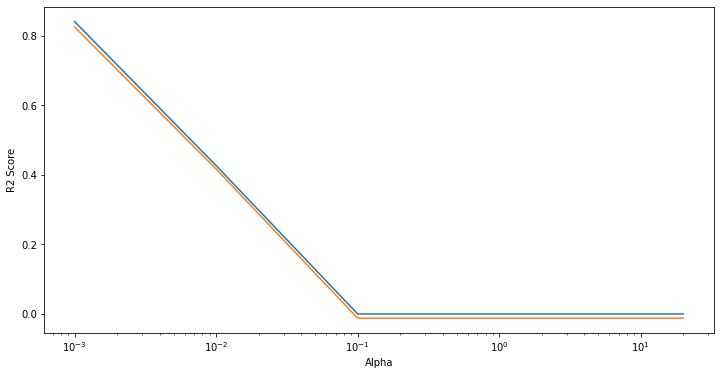

In [133]:
r2_score(cv_result_train_lasso, True)

In [134]:
print('For Lasso, the Best Alpha value = ', model_cv.best_params_['alpha'])


For Lasso, the Best Alpha value =  0.001


In [135]:
# Now that we have optimal value of alpha = 0.001, we can use this alpha to run the model again
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8661140312404666
0.845836167002652


In [136]:
# Lasso coefficients
parameters = list(lm.coef_)
parameters.insert(0,lm.intercept_)
columns = X_train.columns
columns.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(columns,parameters)))
lasso_coef.columns = ['Feaure','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
34,Exterior1st_AsphShn,0.580548
8,MSZoning_RH,0.500806
14,Neighborhood_Crawfor,0.446472
28,RoofMatl_Membran,0.431139
1,BsmtFinSF1,0.388222
10,MSZoning_RM,0.372501
7,MSZoning_FV,0.353423
46,SaleType_ConLD,0.320795
18,Condition1_Norm,0.296423
20,Condition2_PosA,0.280553


### Ridge Regression Model

In [137]:
#Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

# train score
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))

# test score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_test_pred))

0.9125880813177617
0.829036829606254


In [138]:
# Gridsearch Operation on Training data set
# Objective - Find optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [139]:
cv_result_train_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_train_ridge['param_alpha'] = cv_result_train_ridge['param_alpha'].astype('float32')
cv_result_train_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003716,0.000612,0.002181,0.000422,0.001,{'alpha': 0.001},0.909911,0.354116,0.889931,0.623466,...,0.912974,0.914077,0.910153,0.912454,0.911614,0.913034,0.913724,0.916189,0.913012,0.001504
1,0.002589,0.000282,0.001495,0.000092,0.010,{'alpha': 0.01},0.909966,0.355359,0.889825,0.630064,...,0.912606,0.913726,0.909861,0.912070,0.911317,0.912757,0.913357,0.915806,0.912701,0.001495
2,0.002583,0.000180,0.001525,0.000134,0.100,{'alpha': 0.1},0.907012,0.366378,0.885781,0.659917,...,0.901923,0.903495,0.900253,0.900861,0.901558,0.903550,0.902844,0.904720,0.903318,0.003534
3,0.002850,0.000412,0.001678,0.000262,1.000,{'alpha': 1.0},0.892580,0.414016,0.874290,0.687257,...,0.872497,0.877720,0.868807,0.869165,0.870064,0.872802,0.873900,0.873885,0.875395,0.010249
4,0.002492,0.000162,0.001468,0.000029,5.000,{'alpha': 5.0},0.878450,0.438049,0.870783,0.696622,...,0.854740,0.865151,0.849762,0.850231,0.851702,0.853227,0.855509,0.854844,0.857681,0.011448


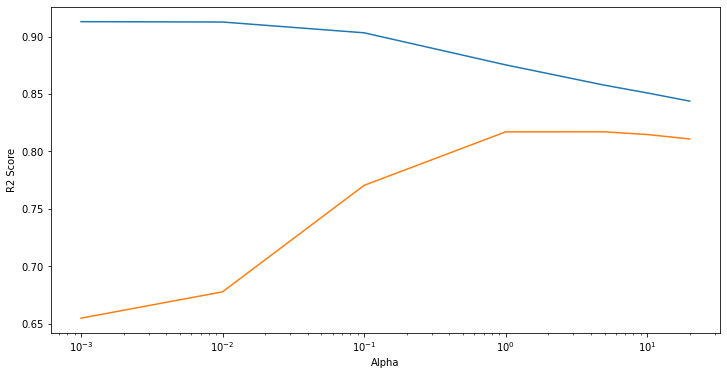

In [140]:
# plot r2_score using the defined function for ridge
r2_score(cv_result_train_ridge, True)

In [141]:
print('For Ridge, the Best Alpha value = ', model_cv.best_params_['alpha'])


For Ridge, the Best Alpha value =  5.0


In [142]:
# Now that we have optimal value of alpha = 5.0, we can use this alpha to run the model again
#Ridge
ridge = Ridge(alpha=5)
ridge.fit(X_train,y_train)

# train score
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))

# test score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_test_pred))

0.8567536585923269
0.8576145928689848


In [143]:
# ridge coefficients
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [144]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
8,MSZoning_RH,0.431087
1,BsmtFinSF1,0.394779
14,Neighborhood_Crawfor,0.378047
7,MSZoning_FV,0.339717
10,MSZoning_RM,0.326720
34,Exterior1st_AsphShn,0.324056
46,SaleType_ConLD,0.304293
28,RoofMatl_Membran,0.280626
18,Condition1_Norm,0.275923
17,Neighborhood_Veenker,0.270081


In [145]:
# Lasso coefs 
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
34,Exterior1st_AsphShn,0.580548
8,MSZoning_RH,0.500806
14,Neighborhood_Crawfor,0.446472
28,RoofMatl_Membran,0.431139
1,BsmtFinSF1,0.388222
10,MSZoning_RM,0.372501
7,MSZoning_FV,0.353423
46,SaleType_ConLD,0.320795
18,Condition1_Norm,0.296423
20,Condition2_PosA,0.280553


### After compairing both the model we can see that the below Features common to both the models are best explaining the DataSet
1. MSZoning_RH
2. BsmtFinSF1
3. Neighborhood_Crawfor
4. MSZoning_FV
5. MSZoning_RM
6. Exterior1st_AsphShn
7. SaleType_ConLD
8. RoofMatl_Membran
9. Condition1_Norm

### Dropping the 5 most imp features from Lasso model and re-running Lasso

In [147]:
X_train_new = X_train.drop(['Exterior1st_AsphShn', 'MSZoning_RH', 'Neighborhood_Crawfor', 'RoofMatl_Membran', 'BsmtFinSF1'], axis=1)
X_test_new = X_test.drop(['Exterior1st_AsphShn', 'MSZoning_RH', 'Neighborhood_Crawfor', 'RoofMatl_Membran', 'BsmtFinSF1'], axis=1)


In [149]:
# Now that we have optimal value of alpha = 0.001, we can use this alpha to run the model again
#Lasso
lm2 = Lasso(alpha=0.001)
lm2.fit(X_train_new, y_train)

# train score
y_train_pred_new = lm2.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_new))

# test score
y_test_pred_new = lm2.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_new))

0.863209065125003
0.8420619529114161


In [150]:
# New Lasso coefficients
parameters2 = list(lm2.coef_)
parameters2.insert(0,lm2.intercept_)
columns2 = X_train_new.columns
columns2.insert(0,'constant')
lasso_coef2 = pd.DataFrame(list(zip(columns2,parameters2)))
lasso_coef2.columns = ['Feaure','Coef']
lasso_coef2.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
30,Exterior1st_BrkFace,0.570317
12,Neighborhood_MeadowV,0.438211
25,RoofMatl_Metal,0.437051
7,MSZoning_RL,0.430528
1,BsmtFinSF2,0.391922
6,MSZoning_FV,0.359619
41,SaleType_ConLD,0.332758
8,MSZoning_RM,0.315064
17,Condition2_PosA,0.313434
15,Condition1_Norm,0.282773
